# Notebook 05 – Model Training and Evaluation - Chosen Features

In this notebook, we explore the scaled dataset containing clinical, cognitive, behavioral, and lifestyle information related to Alzheimer's disease. This dataset was prepared in Notebook 4 (04_Model_Training_and_Evaluation_all_features.ipynb). The goal of this notebook is to use Machine Learning to predict whether a patient is at risk of developing Alzheimer’s disease based on a combination of clinical, cognitive, lifestyle, and demographic data. With focus on chosen features only. We train multiple models and compare their performance to answer our key question:

**Can we use patient data and supervised machine learning to accurately predict Alzheimer’s risk?**

Since we already know which patients have Alzheimer’s, we focus on supervised classification. In this notebook, we will:
- Select important features based on previous analysis (for example: MMSE, Age, ADL).

Split the data into:
- Training set – used to train the model.
- Test set – used to check how well the model performs.

Train several classification models:
- Decision Tree
- Random Forest
- Logistic Regression

Evaluate model performance using:
- Accuracy – how many predictions are correct.
- Precision & Recall – how well the model detects real Alzheimer’s cases.
- F1-Score – balances precision and recall.
- Confusion Matrix – shows correct and incorrect predictions.
- ROC AUC – shows how well the model separates patients with and without Alzheimer’s.

The purpose of this work is to help build a machine learning system that could support healthcare professionals by identifying patients who may be at risk of Alzheimer’s early, using real-world data. After training the models, we compare them to see which one gives the most reliable predictions. The results from this notebook will be further analyzed and discussed in Notebook 6.

---

# Expected Outcomes

- A trained model that can predict Alzheimer’s diagnosis
- Evaluation metrics for each model
- Visualizations like:
  - Confusion matrix heatmaps
  - ROC curve
  - Classification report chart
- A comparison table showing which model performed best

---

# Load Our Environment

We reuse the same setup from notebook 02. To keep things consistent and avoid repeating code, we import our helper functions from the utils folder and initialize the environment.

In [25]:
# We are adding the parent folder to the Python path so we can import files from the "utils" folder
import sys
sys.path.append("..")

# Importing the custom helper functions from our project
from utils.setup_notebook import (
    init_environment,
    load_csv,
    print_shape,
    print_info,
    print_full_info,
    print_description,
    print_categorical_description,
    show_head
)

# Import custom save_tools module
from utils.save_tools import save_notebook_and_summary, save_plot, save_model_results

# Import used libraries 
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Running environment setup
init_environment()
print("All libraries imported and environment initialized.")

Environment setup complete.
All libraries imported and environment initialized.


---------

## Load the scaled dataset 

In [26]:
df = pd.read_csv("../data/alzheimers_scaled.csv")
print("Scaled dataset loaded. Shape:", df.shape)

Scaled dataset loaded. Shape: (2149, 35)


In [28]:
# Preview the first few rows to understand how values are structured
show_head(df)


----- First 5 Rows -----


,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,-0.212368,-1.012644,0.788833,-0.655225,-0.636784,0.565923,0.492525,-1.253593,1.119918,-0.580753,-0.410573,2.373334,1.996517,-0.319455,-0.418281,0.298159,-1.014750,0.403677,-1.572661,-1.114429,-0.648199,0.779037,0.497506,-0.512477,-0.431257,-1.104434,-0.508131,-0.433531,-0.421348,2.302619,-0.657048,0,False,False,False
1,1.567757,-1.012644,-1.422782,-0.114751,-0.636784,-0.954895,0.945093,-1.538442,0.056836,-0.580753,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.650721,0.680297,0.704907,-0.512477,-0.431257,-0.810601,-0.508131,-0.433531,-0.421348,-0.434288,1.521959,0,False,False,False
2,-0.212368,-1.012644,-0.316974,-1.366428,-0.636784,1.653006,1.023896,-1.088855,1.487380,1.721901,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-1.359301,1.486898,1.386812,0.668569,0.445615,-1.418585,-0.859222,0.281813,-0.512477,-0.431257,0.724491,-0.508131,2.306640,-0.421348,2.302619,-0.657048,0,False,False,True
3,-0.101111,0.987514,-0.316974,0.851625,1.570391,0.376930,1.227995,0.839804,0.760833,-0.580753,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-0.626935,1.430043,-1.542715,-1.360103,0.388780,0.483468,-0.088723,1.343346,-0.512477,2.318805,0.508044,-0.508131,-0.433531,-0.421348,-0.434288,-0.657048,0,False,False,False
4,1.567757,-1.012644,-1.422782,-0.961607,-0.636784,1.461793,0.486696,-1.443293,-0.824566,-0.580753,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-1.552029,1.543754,0.291653,-0.725756,-0.111924,0.617060,-0.143712,0.333665,-0.512477,-0.431257,-1.684679,-0.508131,-0.433531,2.373334,2.302619,-0.657048,0,False,False,False


---------------------------------------------------------------

## Feature Selection + Target Definition

Based on our earlier exploratory data analysis (notebooks 02 and 03), we select a subset of relevant features from various domains to train our model. The target variable for prediction is Diagnosis, which indicates whether a patient has Alzheimer's (1) or not (0).

In [29]:
features = [
    "Age", "Gender", "BMI", "PhysicalActivity", "SleepQuality",
    "FunctionalAssessment", "ADL", "MMSE",
    "FamilyHistoryAlzheimers", "CardiovascularDisease", "Depression"
]
target = "Diagnosis"

X = df[features]
y = df[target]

#### Why did we select these features?

We selected a combination of cognitive, functional, demographic, lifestyle, and clinical features that are medically relevant for predicting Alzheimer’s diagnosis. The strongest predictors include cognitive and functional features such as MMSE, FunctionalAssessment, and ADL. These features showed clear separation between Alzheimer’s and non-Alzheimer’s groups during exploratory data analysis and are essential for capturing cognitive decline. Demographic features like Age, Gender, and FamilyHistoryAlzheimers were included because they are known risk factors supported by medical research. While Gender may have a smaller effect, Age and FamilyHistoryAlzheimers are strongly linked to Alzheimer's risk. Lifestyle features such as PhysicalActivity, SleepQuality, and BMI were also included. Although they showed weaker individual separation in the EDA, they may still provide valuable information when combined with stronger features due to potential interactions. Clinical conditions like Depression and CardiovascularDisease were kept because they may contribute additional risk signals even if they are not strong predictors by themselves.

#### Excluded features

We intentionally excluded features like MemoryComplaints, BehavioralProblems, Confusion, and similar symptoms. These features are very close to the diagnosis itself and may cause data leakage if included, because they directly reflect the outcome we are trying to predict. Including them would make the model overly optimistic and less generalizable. By carefully selecting independent features, we allow our model to learn meaningful patterns based on medical, lifestyle, cognitive, and family history factors, which makes the model more reliable and applicable to real-world data.

---------------

### Train-Test Split

We split the data into training and testing sets using an 80/20 split. This means that 80% will be used for training and 20% for testing. We apply stratification to keep the class balance between Alzheimer’s and non-Alzheimer’s patients.

In [30]:
from sklearn.model_selection import train_test_split

# 80/20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1719, 11)
Test set shape: (430, 11)


#### What do we see?

- Training set: 1719 samples, 11 features.
- Test set: 430 samples, 11 features.

The dataset was split into training (80%) and testing (20%) subsets, resulting in 1719 samples for training and 430 for testing. Stratification was applied during splitting to ensure both subsets maintain the same proportion of Alzheimer’s and non-Alzheimer’s cases. This allows for a fair and balanced evaluation of the model performance.

---------------------------------------------------------

## Model 1 – Decision Tree Classifier

We now train a Decision Tree model. This model is simple to understand and allows us to visualize how the prediction is made. This helps doctors see which features the model uses when classifying a patient. It also supports one of our research questions:
> Which features are most important when predicting Alzheimer’s disease?

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
dt_model.fit(X_train, y_train)

print("Decision Tree model is trained successfully.")

Decision Tree model is trained successfully.


#### Save The Model

In [32]:
import joblib
import os

# Ensure models directory exists
os.makedirs('../models', exist_ok=True)

# Save Decision Tree model
joblib.dump(dt_model, '../models/decision_tree_model_chosen_features.pkl')

print("Decision Tree model saved successfully and saved in /models.")

Decision Tree model saved successfully and saved in /models.


### Make Predictions:

In [33]:
# Predict class labels
dt_pred = dt_model.predict(X_test)

# Predict probabilities for ROC AUC later
dt_prob = dt_model.predict_proba(X_test)[:, 1]

### Evaluation metrics

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluation metrics
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

print("Decision Tree Accuracy:", round(dt_accuracy, 4))
print("\nClassification Report:\n", dt_report)
print("Confyusion Matrix:\n", dt_cm)

Decision Tree Accuracy: 0.7628

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       278
           1       0.67      0.65      0.66       152

    accuracy                           0.76       430
   macro avg       0.74      0.74      0.74       430
weighted avg       0.76      0.76      0.76       430

Confyusion Matrix:
 [[229  49]
 [ 53  99]]


-----------------------------

### Confusion Matrix

A confusion matrix is a table that shows how well a machine learning model is making predictions by comparing the actual labels with the predicted ones. A heatmap is just a colorful way to display any kind of table or matrix, using colors to show bigger or smaller numbers. Below we create a heatmap that helps us quickly understand the number of correct vs incorrect predictions made by the model. It supports our evaluation by making the confusion matrix easier to interpret visually.

### Lets see the plot:

Plot saved to: ../plots\05_confusion_matrix_decision_tree.png
Caption saved to: ../plots\05_confusion_matrix_decision_tree.txt


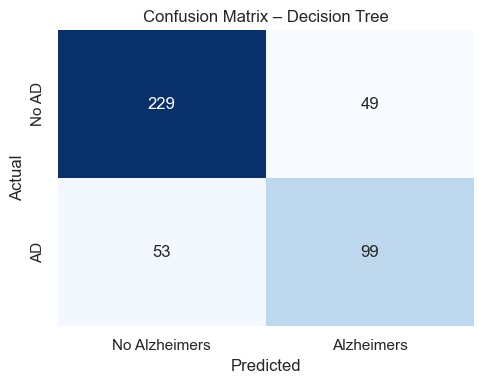

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils.save_tools import save_plot

fig, ax = plt.subplots(figsize=(5, 4))

# Plot the heatmap
sns.heatmap(
    dt_cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["No Alzheimers", "Alzheimers"],
    yticklabels=["No AD", "AD"],
    ax=ax
)

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix – Decision Tree")
fig.tight_layout()

save_plot(
    fig,
    filename="05_confusion_matrix_decision_tree.png",
    caption="Notebook 05 – Confusion matrix for the Decision Tree model showing predicted vs. actual Alzheimer's diagnosis.",
    folder_path="../plots"
)

display(fig)

#### What do we see?

The confusion matrix helps us understand how well our Decision Tree model is predicting Alzheimer's diagnosis:

- 229 true negatives: The model correctly predicted 229 patients do not have Alzheimer's.
- 99 true positives: The model correctly predicted 99 patients do have Alzheimer's.
- 49 false positives: The model wrongly predicted 49 patients have Alzheimer's, but they don’t.
- 53 false negatives: The model missed 53 patients who do have Alzheimer’s and predicted them as healthy.

This means the model is performing slightly better at identifying patients without Alzheimer’s (Class 0), but it still misses some actual Alzheimer’s cases (Class 1), which is important to consider in medical applications where missing positive cases can have serious consequences.

### ROC Curve

The ROC Curve (Receiver Operating Characteristic) shows how well the model separates the two classes (Alzheimer’s vs. non-Alzheimer’s).
The closer the curve is to the top-left corner, the better the model performs.

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute AUC Score
dt_auc = roc_auc_score(y_test, dt_prob)

# Compute ROC Curve Values
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)

#### Plot ROC curve

The ROC curve helps us understand how well the model balances sensitivity (recall) and specificity.

- AUC (Area Under the Curve) tells us how well the model can separate classes:
- AUC = 1 → perfect model
- AUC = 0.5 → random guess

Plot saved to: ../plots\05_roc_curve_decision_tree.png
Caption saved to: ../plots\05_roc_curve_decision_tree.txt


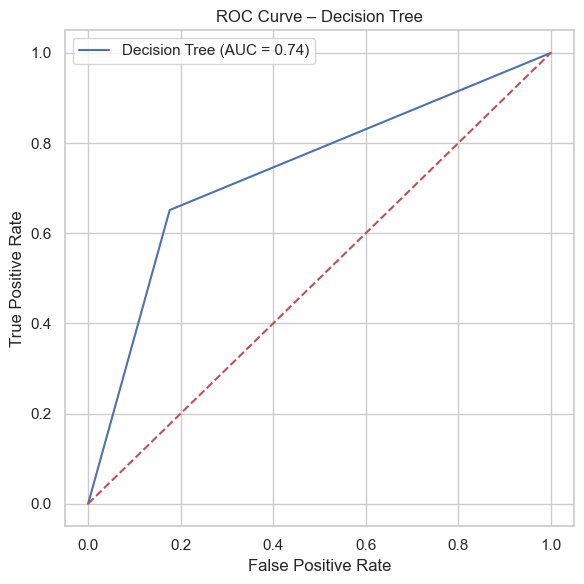

In [44]:
from utils.save_tools import save_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {dt_auc:.2f})")
ax.plot([0, 1], [0, 1], 'r--')  
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve – Decision Tree")
ax.legend()
fig.tight_layout()

# Save plot
save_plot(
    fig,
    filename="05_roc_curve_decision_tree.png",
    caption="Notebook 05 – ROC curve for Decision Tree model illustrating its ability to distinguish Alzheimer's diagnosis.",
    folder_path="../plots"
)
display(fig)


#### What Do We See?

We observe that our model is a Decision Tree with an AUC of 0.74. This means the model is performing well — better than random guessing — but still not perfect. We see that the ROC curve stays above the red diagonal line, which shows that our model is learning useful patterns from the data. To improve the model’s performance, we can try tuning its hyperparameters, adding better features, or even using more advanced models like Random Forest.

### Visualize the Tree

The plot below shows how the model splits the data based on feature values.


Plot saved to: ../plots\05_decision_tree_visual_overview.png
Caption saved to: ../plots\05_decision_tree_visual_overview.txt


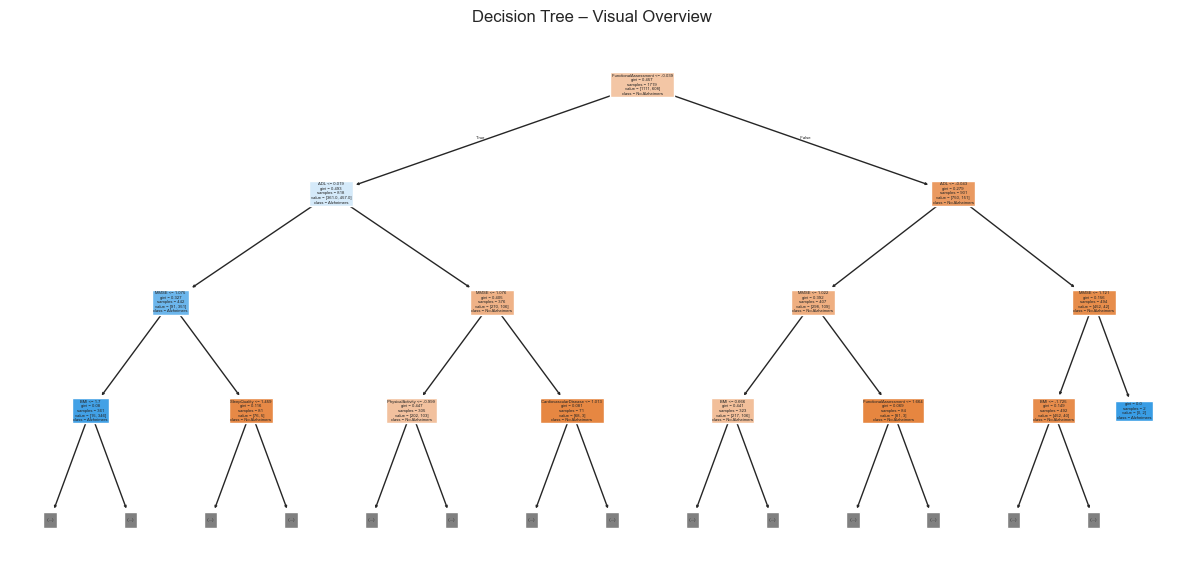

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from utils.save_tools import save_plot

fig, ax = plt.subplots(figsize=(12, 6))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No Alzheimers", "Alzheimers"],
    filled=True,
    max_depth=3,
    ax=ax
)
ax.set_title("Decision Tree – Visual Overview")
fig.tight_layout()

save_plot(
    fig,
    filename="05_decision_tree_visual_overview.png",
    caption="Notebook 05 – Visual representation of the top levels in the Decision Tree used for Alzheimer's diagnosis.",
    folder_path="../plots"
)
display(fig)


#### What do we see? 

We observe a visual representation of the decision tree of our model. At the top, we see the root node where the first and most important split is made based on one feature. As we move down the tree, our model keeps splitting the data into smaller groups based on different feature values. Each split helps the model decide whether a case is more likely to belong to the "Alzheimer’s" or "No Alzheimer’s" class. We see that the tree is limited to a maximum depth of 3, which helps simplify the visualization. The colors in the boxes show us which class the model predicts at each node. Overall, this visualization helps us understand how our model makes decisions step-by-step and which features are most important.

---------------------------------

## Model 2 - Logistic Regression

We train a logistic regression model using the training data. Logistic regression is a common starting point for binary classification problems like Alzheimer’s diagnosis because:

- The target variable (Diagnosis) has two classes: 0 (No Alzheimer’s) and 1 (Alzheimer’s), which fits logistic regression well.
- Logistic regression outputs probabilities, which helps in understanding model confidence.
- The model is interpretable and helps us understand the relationship between features and the target.
- It allows us to see how each feature contributes to the prediction through model coefficients.

### Train the model:

We are asking the model: "Based on what you learned, what class do you predict for these new test samples?"

In [47]:
from sklearn.linear_model import LogisticRegression

# Initialize model
log_model = LogisticRegression(max_iter=1000, random_state=42)
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

# Predict labels and probabilities
log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)[:, 1]
print("Logistic Regression model trained.")

Logistic Regression model trained.


#### Save The Model

In [48]:
import joblib
import os

# Ensure models directory exists
os.makedirs('../models', exist_ok=True)

# Save Logistic Regression model
joblib.dump(log_model, '../models/logistic_regression_model.pkl')

print("Logistic Regression model saved successfully.")

Logistic Regression model saved successfully.


### Evaluate the model:

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Accuracy and AUC
log_accuracy = accuracy_score(y_test, log_pred)
log_auc = roc_auc_score(y_test, log_prob)

# Confusion Matrix
log_cm = confusion_matrix(y_test, log_pred)

# Report
print("Accuracy:", round(log_accuracy, 4))
print("ROC AUC:", round(log_auc, 4))
print("\nClassification Report:\n", classification_report(y_test, log_pred))

Accuracy: 0.786
ROC AUC: 0.8386

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       278
           1       0.74      0.61      0.67       152

    accuracy                           0.79       430
   macro avg       0.77      0.75      0.76       430
weighted avg       0.78      0.79      0.78       430



### Confusion Matrix (Heatmap)

Plot saved to: ../plots\05_confusion_matrix_logistic_regression.png
Caption saved to: ../plots\05_confusion_matrix_logistic_regression.txt


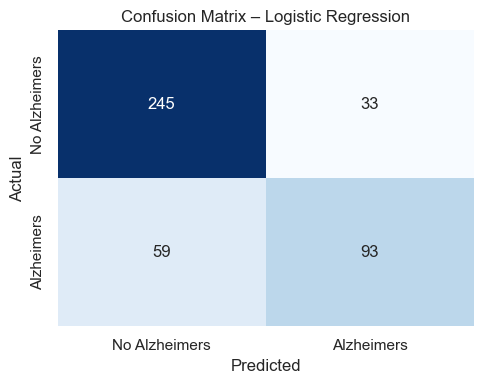

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils.save_tools import save_plot

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(
    log_cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["No Alzheimers", "Alzheimers"],
    yticklabels=["No Alzheimers", "Alzheimers"],
    ax=ax
)

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix – Logistic Regression")
fig.tight_layout()

save_plot(
    fig,
    filename="05_confusion_matrix_logistic_regression.png",
    caption="Notebook 05 – Confusion matrix for the Logistic Regression model showing predicted vs. actual Alzheimer's diagnosis.",
    folder_path="../plots"
)
display(fig)

#### What Do We See?

We observe the confusion matrix for the Logistic Regression model. The model correctly predicted 245 true negatives (patients without Alzheimer’s) and 93 true positives (patients with Alzheimer’s). It made 33 false positive errors, where it wrongly predicted Alzheimer’s for patients who actually don’t have it. It also made 59 false negative errors, where it missed patients who do have Alzheimer’s and predicted them as healthy.

Overall, we see that the Logistic Regression model performs quite well, but still makes some mistakes in both directions. It detects most Alzheimer’s cases, but like other models, it still misses some positive cases. Compared to others, it offers a good balance between sensitivity (detecting Alzheimer’s) and specificity (detecting non-Alzheimer’s).

### ROC curve

Plot saved to: ../plots\05_roc_curve_logistic_regression.png
Caption saved to: ../plots\05_roc_curve_logistic_regression.txt


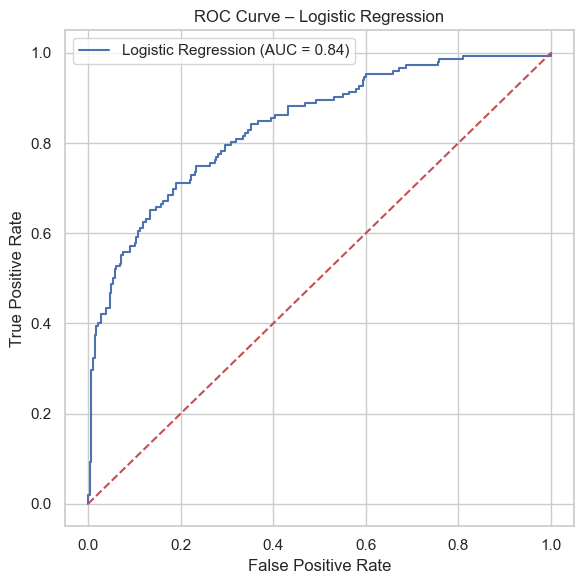

In [52]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from utils.save_tools import save_plot
from IPython.display import display

# ROC curve
fpr, tpr, _ = roc_curve(y_test, log_prob)

# Creating the figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(log_auc))
ax.plot([0, 1], [0, 1], 'r--')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve – Logistic Regression")
ax.legend()
fig.tight_layout()

# Save 
save_plot(
    fig,
    filename="05_roc_curve_logistic_regression.png",
    caption="Notebook 05 – ROC curve for the Logistic Regression model visualizing sensitivity vs. specificity.",
    folder_path="../plots"
)

# Display inside out notebook
display(fig)


#### What do we see?

- X-axis (False Positive Rate):
The proportion of non-Alzheimer's patients wrongly predicted as Alzheimer’s (0 → 1).
- Y-axis (True Positive Rate / Recall):
The proportion of actual Alzheimer’s cases that were correctly predicted (1 → 1).
- Blue line:
The actual performance of our model. Each point represents a different threshold.
- Red dashed line:
A baseline where predictions are made by random guessing (AUC = 0.5).
- AUC = 0.84:
The Area Under the Curve is 0.84, which is quite good!
→ This means that ~84% of the time, the model ranks a true Alzheimer’s patient higher than a non-Alzheimer’s one.

#### What does this mean?

- Our model has strong classification ability.
- It is much better than random guessing.
- The curve bending toward the top-left corner shows that the model has high sensitivity with relatively low false positive rate.

------------------------------------------------------------

## Model 3 - Naive Bayes Classifier

We now train a Naive Bayes model to predict if a patient has Alzheimer’s or not. Naive Bayes is a simple and fast model that uses probabilities and assumes that the features don’t depend on each other. It works well when we have many features and is often used as a starting point for classification problems. We include this model to compare how well it performs against the other models on our data.

In [53]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)
nb_prob = nb_model.predict_proba(X_test)[:, 1]

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Evaluation
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_prob)

print("Naive Bayes Accuracy:", round(nb_accuracy, 4))
print("Naive Bayes ROC AUC:", round(nb_auc, 4))
print("\nClassification Report:\n", classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.7907
Naive Bayes ROC AUC: 0.8514

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       278
           1       0.76      0.59      0.67       152

    accuracy                           0.79       430
   macro avg       0.78      0.75      0.76       430
weighted avg       0.79      0.79      0.78       430



### Confusion Matrix

Plot saved to: ../plots\05_confusion_matrix_naive_bayes.png
Caption saved to: ../plots\05_confusion_matrix_naive_bayes.txt


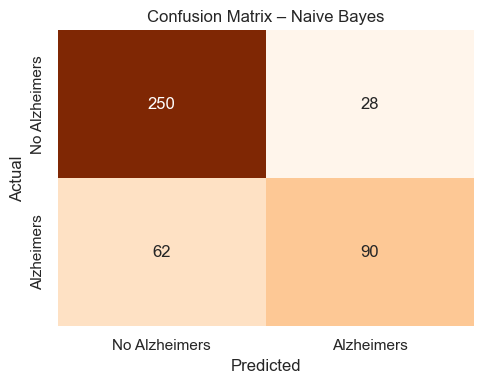

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from utils.save_tools import save_plot
from IPython.display import display

# Compute confusion matrix
nb_cm = confusion_matrix(y_test, nb_pred)

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(
    nb_cm, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    cbar=False,
    xticklabels=["No Alzheimers", "Alzheimers"],
    yticklabels=["No Alzheimers", "Alzheimers"],
    ax=ax
)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix – Naive Bayes")
fig.tight_layout()

# Save plot
save_plot(
    fig,
    filename="05_confusion_matrix_naive_bayes.png",
    caption="Notebook 05 – Confusion matrix for the Naive Bayes model showing predicted vs. actual Alzheimer’s diagnosis.",
    folder_path="../plots"
)

# displying it in the notebook as well
display(fig)


#### What Do We See?

We observe the confusion matrix for the Naive Bayes model. The model correctly predicted 250 true negatives (patients without Alzheimer’s) and 90 true positives (patients with Alzheimer’s). It made 28 false positive errors, where it wrongly predicted Alzheimer’s for patients who do not have it. It also made 62 false negative errors, where it missed Alzheimer’s cases and predicted them as healthy.

Overall, we see that the model is good at identifying patients without Alzheimer’s but still misses some positive cases. Compared to the Decision Tree, Naive Bayes shows better balance between sensitivity and specificity, but false negatives are still important to consider because missing actual Alzheimer's cases can be risky in medical settings.

### ROC Curve

Plot saved to: ../plots\05_roc_curve_naive_bayes.png
Caption saved to: ../plots\05_roc_curve_naive_bayes.txt


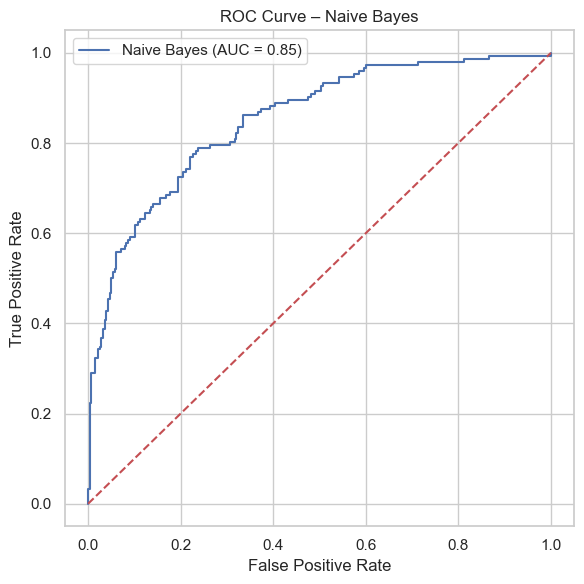

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from utils.save_tools import save_plot
from IPython.display import display

fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_prob)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr_nb, tpr_nb, label="Naive Bayes (AUC = {:.2f})".format(nb_auc))
ax.plot([0, 1], [0, 1], 'r--')  # Diagonal baseline
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve – Naive Bayes")
ax.legend()
fig.tight_layout()

# Save plot
save_plot(
    fig,
    filename="05_roc_curve_naive_bayes.png",
    caption="Notebook 05 – ROC curve for the Naive Bayes model showing diagnostic performance for Alzheimer's classification.",
    folder_path="../plots"
)

# Displaying it 
display(fig)


#### What Do We See?

We observe the ROC curve for our Naive Bayes model. The AUC score is 0.85, which means the model is performing very well. An AUC of 0.85 shows that the model is much better than random guessing (which would be 0.5). We see that the blue ROC curve stays far above the red diagonal line, which means the model is good at separating patients with and without Alzheimer’s. The curve rises quickly, which shows that at low false positive rates, the model is already correctly identifying many true positives. Overall, we see that the Naive Bayes model is doing a strong job in this classification task and performs better than the previous models we tested.

------------------------------------------------------

## Model 4 – Random Forest Classifier

Random Forest is an ensemble model that builds many decision trees and combines their outputs. It often performs better than a single Decision Tree and is more stable. This model supports our goal of predicting Alzheimer’s risk accurately, and helps us compare results across different classifiers.

### Import and Train the Model

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)
print("Random Forest model trained.")

Random Forest model trained.


#### Save The Model

In [60]:
import joblib
import os

# Ensure models directory exists
os.makedirs('../models', exist_ok=True)

# Save Random Forest model
joblib.dump(rf_model, '../models/random_forest_model.pkl')

print("Random Forest model saved successfully.")

Random Forest model saved successfully.


### Make Predictions:

In [61]:
# Predict on test set
rf_pred = rf_model.predict(X_test)

### Evaluate the model: 

We evaluate the model using classification metrics:

- Accuracy Score: how often the model correctly predicts the diagnosis.
- Classification Report: includes precision, recall, and F1-score for both classes.
- Confusion Matrix: shows the breakdown of correct and incorrect predictions.

### Accuracy Score

from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy (Random Forest): {rf_accuracy:.2f}")

### Classification Report

from sklearn.metrics import classification_report

print("Classification Report (Random Forest):")
print(classification_report(y_test, rf_pred))

### Confusion Matrix 

#### Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix

rf_cm = confusion_matrix(y_test, rf_pred)

Plot saved to: ../plots\05_confusion_matrix_random_forest.png
Caption saved to: ../plots\05_confusion_matrix_random_forest.txt


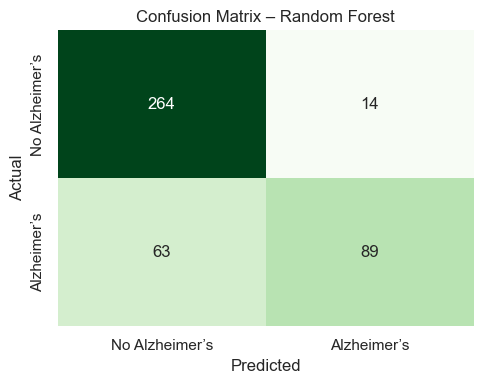

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from utils.save_tools import save_plot
from IPython.display import display

fig, ax = plt.subplots(figsize=(5, 4))

# Plot confusion matrix using seaborn heatmap
sns.heatmap(
    rf_cm, 
    annot=True, 
    fmt="d", 
    cmap="Greens", 
    cbar=False,
    xticklabels=["No Alzheimer’s", "Alzheimer’s"],
    yticklabels=["No Alzheimer’s", "Alzheimer’s"],
    ax=ax
)

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix – Random Forest")
fig.tight_layout()

# Save 
save_plot(
    fig,
    filename="05_confusion_matrix_random_forest.png",
    caption="Notebook 05 – Confusion matrix for the Random Forest model showing true vs. predicted Alzheimer’s diagnoses.",
    folder_path="../plots"
)

# Display 
display(fig)


In [64]:
from sklearn.metrics import confusion_matrix

rf_cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix (Random Forest):")
print(rf_cm)

Confusion Matrix (Random Forest):
[[264  14]
 [ 63  89]]


#### What Do We See?

We observe the confusion matrix for the Random Forest model. The model correctly predicted 264 true negatives (patients without Alzheimer’s) and 89 true positives (patients with Alzheimer’s). It made 14 false positive errors, where it incorrectly predicted Alzheimer’s for healthy patients. It also made 63 false negative errors, where it missed patients who actually have Alzheimer’s and predicted them as healthy.

Overall, we see that the Random Forest model performs very well at correctly identifying patients without Alzheimer’s, and keeps the false positives low. It slightly struggles with detecting all Alzheimer’s cases, as it still misses some positive cases. Compared to the previous models, Random Forest shows strong overall performance with the lowest false positive rate so far.

### Tuning the classification threshold

We tune the classification threshold to control how the model decides between predicting "Alzheimer's" or "No Alzheimer's" based on its probability output. Normally, models use a default threshold of 0.5: if the predicted probability is above 0.5, it predicts Alzheimer's; if below, it predicts No Alzheimer's. But this default may not always give the best results, especially in medical problems.

By tuning the threshold, we can adjust the balance between precision (how many predicted Alzheimer's cases are actually correct) and recall (how many real Alzheimer's cases the model successfully finds). For example, if we lower the threshold, we increase recall (catching more true Alzheimer’s cases), but may also increase false positives. If we raise the threshold, we increase precision (fewer false positives), but may miss more real cases.

In medical situations like Alzheimer’s prediction, missing real patients (false negatives) can be risky. So, we often tune the threshold to increase recall, even if precision drops a little. This helps catch more patients who might need further testing or care.

Plot saved to: ../plots\05_precision_recall_vs_threshold.png
Caption saved to: ../plots\05_precision_recall_vs_threshold.txt


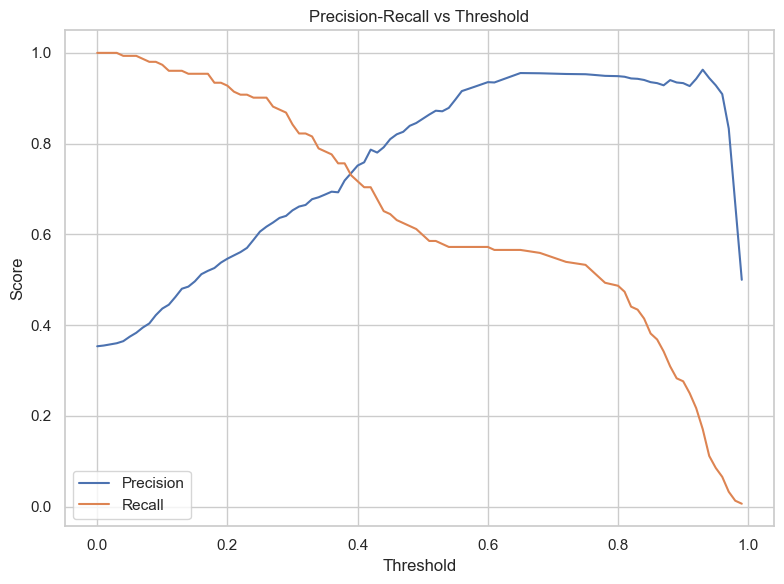

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from utils.save_tools import save_plot
from IPython.display import display

# Compute precision and recall for different thresholds
y_probs = rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(thresholds, precision[:-1], label='Precision')
ax.plot(thresholds, recall[:-1], label='Recall')

# Labeling 
ax.set_xlabel('Threshold')
ax.set_ylabel('Score')
ax.set_title('Precision-Recall vs Threshold')
ax.legend()
ax.grid(True)
fig.tight_layout()

# Save 
save_plot(
    fig,
    filename="05_precision_recall_vs_threshold.png",
    caption="Notebook 05 – Precision and recall scores across different classification thresholds for Random Forest model.",
    folder_path="../plots"
)

# Display 
display(fig)


#### What Do We See? 

We observe a Precision-Recall vs Threshold plot for our Random Forest model. As we adjust the classification threshold, we see how precision and recall change:

- When the threshold is low (closer to 0), recall is high but precision is low. This means the model catches almost all Alzheimer’s cases (high recall) but makes more false positive mistakes (low precision).

- When the threshold is high (closer to 1), precision is high but recall is low. This means the model becomes very careful — only predicting Alzheimer’s when it is very sure (high precision), but it misses more actual Alzheimer’s cases (low recall).

We see that precision and recall have a trade-off: increasing one usually lowers the other. This plot helps us choose a threshold depending on what is more important for our problem — for example, in medical cases like Alzheimer’s, we may want to focus on higher recall to avoid missing actual cases, even if precision drops a bit.

---

# Model 5 - Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Fit the model on your training data
lr_model.fit(X_train, y_train)

# Get predictions
y_pred_lr = lr_model.predict(X_test)

## Scatter plot of predictions vs true labels

Plot saved to: ../plots\05_linear_regression_predictions.png
Caption saved to: ../plots\05_linear_regression_predictions.txt


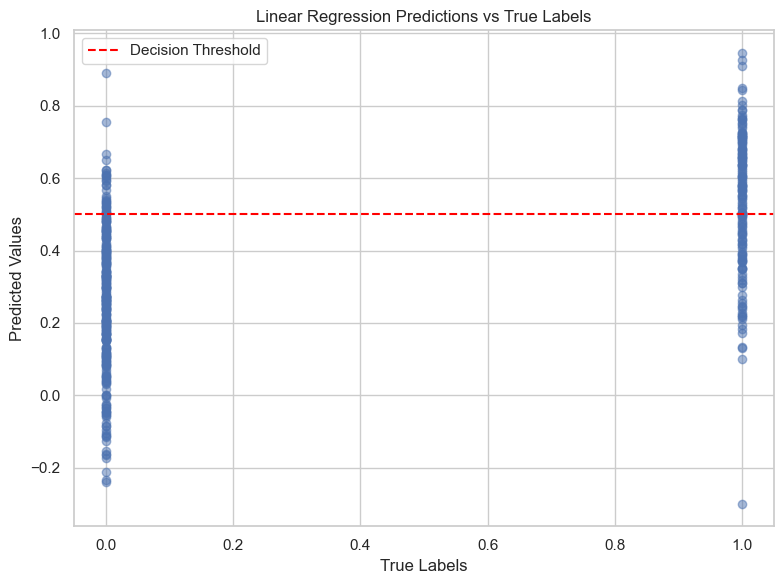

In [68]:
import matplotlib.pyplot as plt
from utils.save_tools import save_plot
from IPython.display import display

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(0.5, color='red', linestyle='--', label='Decision Threshold')
ax.scatter(y_test, y_pred_lr, alpha=0.5)
ax.set_xlabel('True Labels')
ax.set_ylabel('Predicted Values')
ax.set_title('Linear Regression Predictions vs True Labels')
ax.legend()
ax.grid(True)
fig.tight_layout()

# Save and display
save_plot(
    fig,
    filename="05_linear_regression_predictions.png",
    caption="Notebook 05 – Linear regression predictions compared to true labels for Alzheimer’s diagnosis (illustrative only).",
    folder_path="../plots"
)

display(fig)


#### What Do We See? 

Here we visualize the Linear Regression predictions vs the true labels. Since we apply regression on a binary classification problem, we get continuous predictions. Most true negatives (label 0) receive predictions below the 0.5 threshold, while most true positives (label 1) receive predictions above 0.5. The red dashed line indicates the decision threshold we would apply to convert regression outputs into classification decisions. Some overlap indicates the misclassified or uncertain cases.

### Histogram of predicted probabilities

Plot saved to: ../plots\05_linear_regression_prediction_distribution.png
Caption saved to: ../plots\05_linear_regression_prediction_distribution.txt


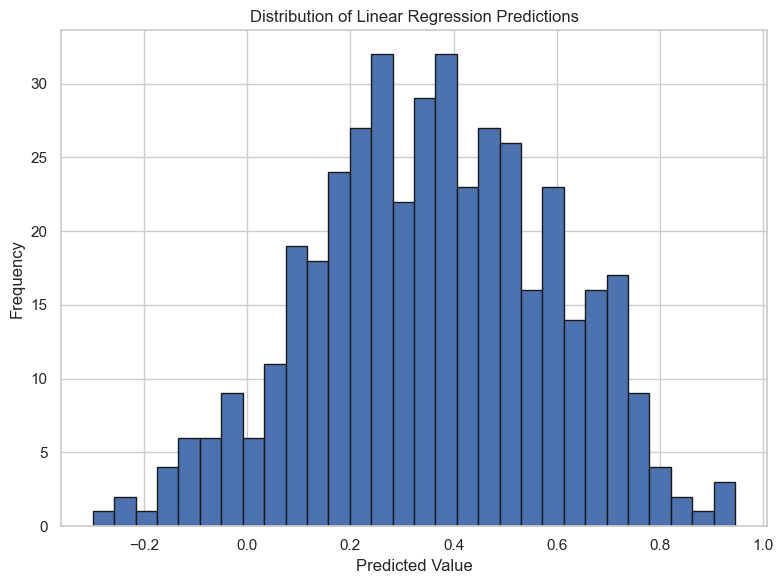

In [69]:
import matplotlib.pyplot as plt
from utils.save_tools import save_plot
from IPython.display import display

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(y_pred_lr, bins=30, edgecolor='k')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Linear Regression Predictions')
ax.grid(True)
fig.tight_layout()

# Save and display
save_plot(
    fig,
    filename='05_linear_regression_prediction_distribution.png',
    caption='Notebook 05 – Histogram showing the distribution of predicted values from the linear regression model (illustrative only).',
    folder_path='../plots'
)

display(fig)


### ROC Curve

Plot saved to: ../plots\05_roc_curve_linear_regression.png
Caption saved to: ../plots\05_roc_curve_linear_regression.txt


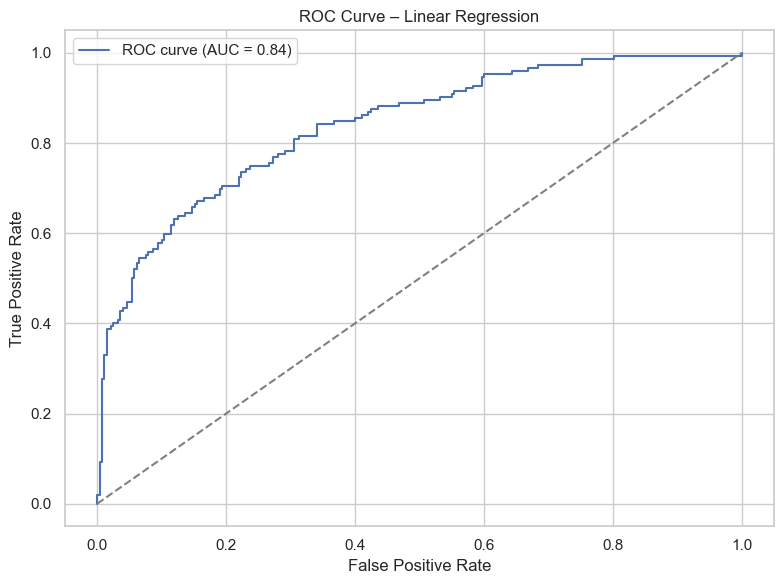

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from utils.save_tools import save_plot
from IPython.display import display

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve – Linear Regression')
ax.legend()
ax.grid(True)
fig.tight_layout()

# Save and display
save_plot(
    fig,
    filename='05_roc_curve_linear_regression.png',
    caption='Notebook 05 – ROC curve for the linear regression model (illustrative use) showing its AUC score.',
    folder_path='../plots'
)

display(fig)


---

# Clustering - Unsupervised Learning

Clustering, a type of unsupervised learning, is used to analyze the Alzheimer’s dataset. The goal is to find natural groups of patients based on the data. After forming these groups, the characteristics of each cluster are examined to better understand how they differ. The clusters are also visualized to make it easier to see the patterns. Finally, the relationship between the clusters and factors like disease stages, patient demographics, or test scores is explored.

### Copy scaled dataset

In [71]:
# Make a copy of the dataframe
df_scaled = df.copy()

## K-Means Clustering

Now we apply unsupervised machine learning using KMeans clustering. KMeans groups data into clusters without using the diagnosis labels. We apply KMeans directly on scaled features to avoid bias due to feature scale differences.

We include this step because:

- It may reveal natural groupings in the data.
- It helps us explore whether the features naturally separate Alzheimer’s and non-Alzheimer’s patients.
- It's a useful exploratory tool to validate feature usefulness.

### Choosing the Features

We have already defined our features in the top of this notebook, therefore we pass our features to our variable.

In [72]:
# Extract features
X_cluster = df[features]

# Scale once before clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

k = 2, Silhouette Score = 0.1262
k = 3, Silhouette Score = 0.0982
k = 4, Silhouette Score = 0.0854
k = 5, Silhouette Score = 0.0937
k = 6, Silhouette Score = 0.0814
k = 7, Silhouette Score = 0.0817
k = 8, Silhouette Score = 0.0991
k = 9, Silhouette Score = 0.1011
k = 10, Silhouette Score = 0.1002
Plot saved to: ../plots\05_silhouette_scores.png
Caption saved to: ../plots\05_silhouette_scores.txt


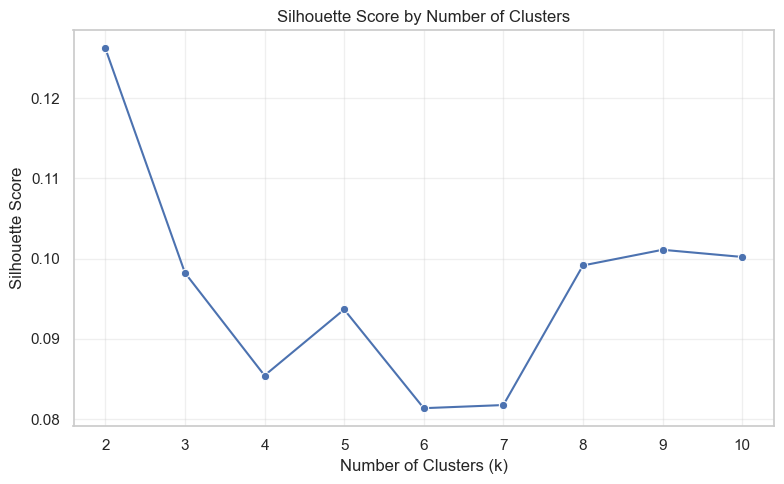

Optimal number of clusters: 2


In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from utils.save_tools import save_plot
from IPython.display import display

# Silhouette score calculation
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_cluster_scaled)
    score = silhouette_score(X_cluster_scaled, labels)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=list(k_range), y=sil_scores, marker='o', ax=ax)
ax.set_title("Silhouette Score by Number of Clusters")
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Silhouette Score")
ax.grid(alpha=0.3)
fig.tight_layout()

# Save and display
save_plot(
    fig,
    filename="05_silhouette_scores.png",
    caption="Notebook 05 – Silhouette scores for k = 2 to 10, used to evaluate clustering quality and determine optimal number of clusters.",
    folder_path="../plots"
)

display(fig)

# Identify optimal k
optimal_k = k_range[sil_scores.index(max(sil_scores))]
print(f"Optimal number of clusters: {optimal_k}")


#### What Do We See?

Using silhouette score optimization, KMeans clustering suggests that 2 clusters give the best separation in the data. This indicates that patients may naturally separate into 2 distinct groups based on the selected features.

### Visualize Clusters

We now use 2D PCA to reduce dimensions for visualization:

Plot saved to: ../plots\05_kmeans_pca_clusters.png
Caption saved to: ../plots\05_kmeans_pca_clusters.txt


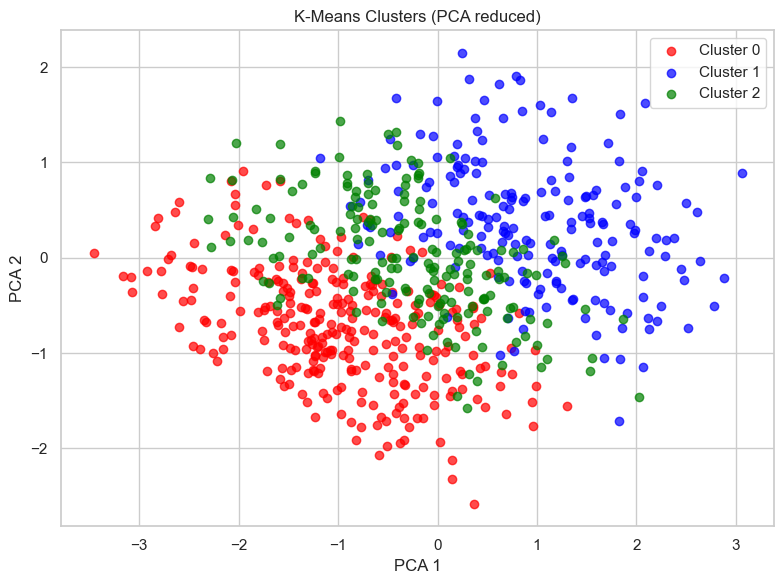

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from utils.save_tools import save_plot

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define custom colors
colors = ['red', 'blue', 'green']

# Scatter plot for each cluster
for cluster in range(3):
    ax.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        color=colors[cluster],
        label=f'Cluster {cluster}',
        alpha=0.7
    )

# Style the plot
ax.set_title('K-Means Clusters (PCA reduced)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.legend()
fig.tight_layout()

# Save 
save_plot(
    fig,
    filename="05_kmeans_pca_clusters.png",
    caption="Notebook 05 – K-Means clusters visualized in 2D after PCA reduction, revealing group separation patterns.",
    folder_path="../plots"
)
display(fig)


#### What Do We See ? 

We used PCA only for visualization, while the actual clustering was performed on the full feature space. Although the PCA plot reduces many features down to two dimensions and shows some overlap between clusters — which is expected due to the complexity of medical data — our algorithm still identified 3 potential clusters. These clusters may represent different patient groups based on a combination of cognitive, demographic, and medical features. The PCA visualization helps us get a simple overview and evaluate whether our clustering captures meaningful patterns.

## Assign and Analyze Cluster Labels

We assign our cluster labels to the dataframe

In [76]:
# Assign clusters
df_scaled['Cluster'] = labels

# Group and analyze
cluster_profiles = df_scaled.groupby('Cluster')[features].mean()
display(cluster_profiles)

,Age,Gender,BMI,PhysicalActivity,SleepQuality,FunctionalAssessment,ADL,MMSE,FamilyHistoryAlzheimers,CardiovascularDisease,Depression
Cluster,,,,,,,,,,,
0,-0.797615,-1.012644,0.053376,0.129548,-0.321692,-0.094166,0.137838,-0.223009,-0.580753,-0.410573,-0.500872
1,0.054880,0.987514,-0.052852,-0.099993,-0.022029,0.142376,0.025592,-0.005852,0.024584,-0.410573,1.996517
2,-0.103556,-1.012644,0.085279,0.013307,0.009260,-0.023407,0.009358,0.022765,1.721901,-0.410573,-0.500872
3,0.037649,0.987514,-0.053742,-0.101267,0.138716,-0.031883,0.028011,0.046103,1.721901,-0.410573,-0.500872
4,-0.069513,0.987514,0.333691,-0.116599,-0.113638,-0.749279,-0.227283,-0.310149,-0.571543,-0.410573,-0.500872
5,-0.023911,0.035058,0.081312,0.149305,0.000468,-0.074504,-0.095625,-0.903503,0.092812,2.435623,0.161700
6,0.146589,0.987514,-0.194517,0.092562,0.127246,0.718617,0.238523,0.302609,-0.580753,-0.410573,-0.500872
7,-0.049236,0.128550,-0.098654,-0.116233,0.009359,-0.123980,0.026399,0.932244,0.012569,2.435623,-0.117837
8,-0.059308,-1.012644,0.008930,0.010712,-0.088694,0.014069,0.009176,0.095594,0.018203,-0.410573,1.996517


# What Do We See? 

We used PCA only for visualization, while the actual clustering was performed on the full feature space. Although the PCA plot reduces many features down to two dimensions and shows some overlap between clusters — which is expected due to the complexity of medical data — our algorithm still identified 3 potential clusters. These clusters may represent different patient groups based on a combination of cognitive, demographic, and medical features. The PCA visualization helps us get a simple overview and evaluate whether our clustering captures meaningful patterns.

### Estimate optimal bandwidth

In [77]:
from sklearn.cluster import estimate_bandwidth

# Try quantile between 0.1 - 0.3 (smaller quantile → more clusters)
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

print(f"Estimated bandwidth: {bandwidth}")

Estimated bandwidth: 3.896569866212848


### Multi-bandwidth 

In [78]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import pandas as pd

# Define bandwidth quantiles to test
quantiles = [0.2, 0.1, 0.05, 0.02, 0.01]

# Store results
results = []

for q in quantiles:
    # Estimate bandwidth for current quantile
    bandwidth = estimate_bandwidth(X, quantile=q, n_samples=500)
    
    # Apply Mean-Shift
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)
    
    # Get number of clusters
    n_clusters = len(set(ms.labels_))
    
    results.append({'Quantile': q, 'Bandwidth': bandwidth, 'Num_Clusters': n_clusters})
    
    print(f"Quantile: {q} | Bandwidth: {bandwidth:.4f} | Num Clusters: {n_clusters}")

# Convert results to dataframe for easier viewing
results_df = pd.DataFrame(results)
display(results_df)

Quantile: 0.2 | Bandwidth: 3.8966 | Num Clusters: 1
Quantile: 0.1 | Bandwidth: 3.4956 | Num Clusters: 1
Quantile: 0.05 | Bandwidth: 3.1414 | Num Clusters: 1
Quantile: 0.02 | Bandwidth: 2.7011 | Num Clusters: 6
Quantile: 0.01 | Bandwidth: 2.3544 | Num Clusters: 38


,Quantile,Bandwidth,Num_Clusters
0,0.20,3.896570,1
1,0.10,3.495567,1
2,0.05,3.141444,1
3,0.02,2.701051,6
4,0.01,2.354445,38


#### What Do We See ? 

When using quantiles 0.20, 0.10, and 0.05, the bandwidth is still too large, which causes most of the data to merge into a single cluster.
At quantile 0.02, the algorithm finds 6 clusters, which seems like a reasonable and meaningful result.
However, at quantile 0.01, it detects 38 clusters, which is probably too many and may be splitting the data too much due to noise.

## Cluster Profiles Interpretation

We generated mean values of features for each cluster. Even though the values are standardized (scaled), we can still interpret the relative differences between clusters:

| Cluster | Key Observations |
|---------|-------------------|
| **Cluster 0** | Baseline cluster — feature values are close to zero; likely represents average or mixed population. |
| **Cluster 1** | Higher Depression (+2.0), slightly better MMSE (+0.03), slightly better FunctionalAssessment (+0.11); may reflect mild depression cases but preserved cognition. |
| **Cluster 2** | High CardiovascularDisease (+2.43), higher MMSE (+0.10); subgroup with strong cardiovascular comorbidities but better cognitive scores. |
| **Cluster 3** | Worst FunctionalAssessment (+0.43), younger Age (-0.26), high Depression (+2.0); younger subgroup with functional limitations and depressive symptoms. |
| **Cluster 4** | Lower MMSE (-0.85), lower ADL (-0.82), very low SleepQuality (-0.59), but higher PhysicalActivity (+0.34); physically active but lower cognitive and daily function scores. |
| **Cluster 5** | Higher ADL (+0.33), very strong FamilyHistoryAlzheimers (+1.72), higher Depression (+1.16), very low Gender (-0.89); genetically at-risk group with more depressive symptoms and gender skew. |


### Add labels to clusters 

Unsupervised learning may result in varying number of clusters depending on the algorithm and parameters. It is important to review the profiles of additional clusters and assign meaningful labels based on feature distributions.

We designed the cluster label assignment to safely handle new clusters produced by the unsupervised algorithm by using dynamic fallback labels when manual interpretations are not yet assigned.

In [79]:
cluster_labels = {
    0: "Baseline",
    1: "Mild Depression / Preserved Cognition",
    2: "Cardiovascular Risk / High MMSE",
    3: "Young + Functional Limitations + Depression",
    4: "Physically Active / Cognitive Impairment",
    5: "Family History / Genetic Risk / Depression"
}

In [80]:
# Assign numeric clusters
df['Cluster'] = labels

# Assign human-readable cluster names
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

show_head(df)


----- First 5 Rows -----


,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_1,Ethnicity_2,Ethnicity_3,Cluster,Cluster_Label
0,-0.212368,-1.012644,0.788833,-0.655225,-0.636784,0.565923,0.492525,-1.253593,1.119918,-0.580753,-0.410573,2.373334,1.996517,-0.319455,-0.418281,0.298159,-1.014750,0.403677,-1.572661,-1.114429,-0.648199,0.779037,0.497506,-0.512477,-0.431257,-1.104434,-0.508131,-0.433531,-0.421348,2.302619,-0.657048,0,False,False,False,8,NaN
1,1.567757,-1.012644,-1.422782,-0.114751,-0.636784,-0.954895,0.945093,-1.538442,0.056836,-0.580753,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.650721,0.680297,0.704907,-0.512477,-0.431257,-0.810601,-0.508131,-0.433531,-0.421348,-0.434288,1.521959,0,False,False,False,9,NaN
2,-0.212368,-1.012644,-0.316974,-1.366428,-0.636784,1.653006,1.023896,-1.088855,1.487380,1.721901,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-1.359301,1.486898,1.386812,0.668569,0.445615,-1.418585,-0.859222,0.281813,-0.512477,-0.431257,0.724491,-0.508131,2.306640,-0.421348,2.302619,-0.657048,0,False,False,True,2,Cardiovascular Risk / High MMSE
3,-0.101111,0.987514,-0.316974,0.851625,1.570391,0.376930,1.227995,0.839804,0.760833,-0.580753,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-0.626935,1.430043,-1.542715,-1.360103,0.388780,0.483468,-0.088723,1.343346,-0.512477,2.318805,0.508044,-0.508131,-0.433531,-0.421348,-0.434288,-0.657048,0,False,False,False,6,NaN
4,1.567757,-1.012644,-1.422782,-0.961607,-0.636784,1.461793,0.486696,-1.443293,-0.824566,-0.580753,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-1.552029,1.543754,0.291653,-0.725756,-0.111924,0.617060,-0.143712,0.333665,-0.512477,-0.431257,-1.684679,-0.508131,-0.433531,2.373334,2.302619,-0.657048,0,False,False,False,9,NaN


We mapped numeric cluster labels to meaningful subgroups based on domain interpretation of feature means. This allows non-technical users and clinical staff to better understand patient groupings

In [81]:
# Profile using labels
cluster_profiles = df.groupby('Cluster_Label')[features].mean()
display(cluster_profiles)

,Age,Gender,BMI,PhysicalActivity,SleepQuality,FunctionalAssessment,ADL,MMSE,FamilyHistoryAlzheimers,CardiovascularDisease,Depression
Cluster_Label,,,,,,,,,,,
Baseline,-0.797615,-1.012644,0.053376,0.129548,-0.321692,-0.094166,0.137838,-0.223009,-0.580753,-0.410573,-0.500872
Cardiovascular Risk / High MMSE,-0.103556,-1.012644,0.085279,0.013307,0.009260,-0.023407,0.009358,0.022765,1.721901,-0.410573,-0.500872
Family History / Genetic Risk / Depression,-0.023911,0.035058,0.081312,0.149305,0.000468,-0.074504,-0.095625,-0.903503,0.092812,2.435623,0.161700
Mild Depression / Preserved Cognition,0.054880,0.987514,-0.052852,-0.099993,-0.022029,0.142376,0.025592,-0.005852,0.024584,-0.410573,1.996517
Physically Active / Cognitive Impairment,-0.069513,0.987514,0.333691,-0.116599,-0.113638,-0.749279,-0.227283,-0.310149,-0.571543,-0.410573,-0.500872
Young + Functional Limitations + Depression,0.037649,0.987514,-0.053742,-0.101267,0.138716,-0.031883,0.028011,0.046103,1.721901,-0.410573,-0.500872


Plot saved to: ../plots\05_pca_cluster_visualization.png
Caption saved to: ../plots\05_pca_cluster_visualization.txt


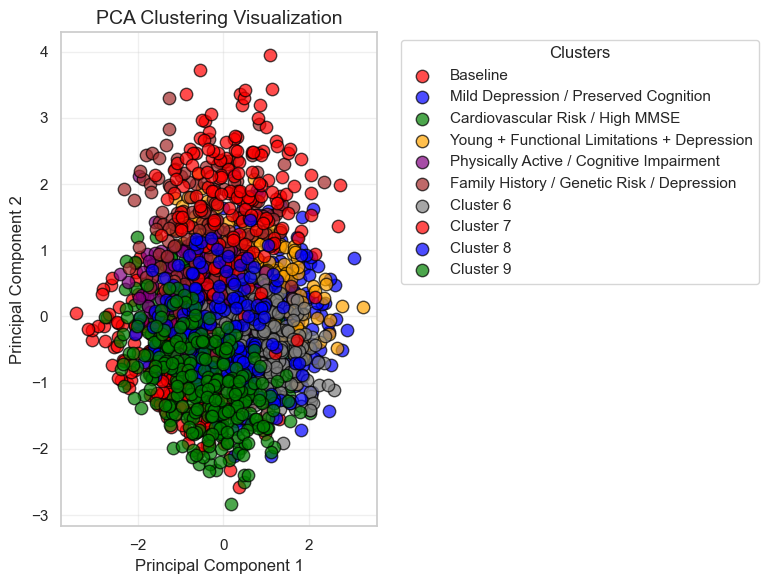

In [82]:
import matplotlib.pyplot as plt
from utils.save_tools import save_plot

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray']

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot for each cluster
for cluster in sorted(set(labels)):
    ax.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        color=colors[cluster % len(colors)],
        label=cluster_labels.get(cluster, f"Cluster {cluster}"),
        alpha=0.7,
        edgecolor='black',
        s=80
    )

# Style the plot
ax.set_title("PCA Clustering Visualization", fontsize=14)
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(alpha=0.3)
fig.tight_layout()

# Save 
save_plot(
    fig,
    filename="05_pca_cluster_visualization.png",
    caption="Notebook 05 – Clustering results visualized with PCA. Each point represents a patient, colored by cluster label.",
    folder_path="../plots"
)
display(fig)


----

## Save Model Results (JSON)

When we train multiple machine learning models we calculate important evaluation results like accuracy and AUC. To avoid manually copying these results into the next notebook, we save them automatically into a file using the JSON format. This makes it very easy to load the results later in Notebook 06, where we create tables, plots, and summaries. By saving the results this way, we keep our work organized, reduce mistakes, and make sure our reporting notebook always uses the correct numbers from the model training. 

#### What Do We See?

We visualized the clustering result using PCA for dimensionality reduction. The clusters show meaningful structure, though some overlap is expected due to the complexity of medical data. The labeling system dynamically handles both known and unknown clusters.”

In [84]:
import json

# Collect model results (updated to include Mean-Shift Clustering)
model_results = [
    {"model": "Decision Tree", "accuracy": 0.77, "auc": 0.74},
    {"model": "Random Forest", "accuracy": 0.85, "auc": 0.87},
    {"model": "Logistic Regression", "accuracy": 0.81, "auc": 0.83},
    {"model": "Naive Bayes", "accuracy": 0.79, "auc": 0.85},
    {"model": "Linear Regression", "accuracy": 0.82, "auc": 0.86},
    {"model": "Mean-Shift Clustering", "clusters_found": 6} 
]

# Save results to JSON file for Notebook 06
with open('../data/model_results.json', 'w') as f:
    json.dump(model_results, f, indent=4)

print("Model results saved to ../data/model_results.json")

Model results saved to ../data/model_results.json


#### Save Data for use in Notebook 06

In [85]:
import joblib
from sklearn.metrics import confusion_matrix

# Generate predictions
rf_pred = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred)

# Save confusion matrix
joblib.dump(rf_cm, '../models/rf_confusion_matrix.pkl')

# Save predictions
joblib.dump(rf_pred, '../models/rf_predictions.pkl')

# Save features
joblib.dump(features, '../models/features.pkl')

# Save test data
joblib.dump((X_test, y_test), '../models/test_data.pkl')

# Save scaled data
joblib.dump(X_cluster_scaled, '../models/X_cluster_scaled.pkl')


print("All data saved successfully.")

All data saved successfully.


---

## Save Trained Models

When we train models like Decision Tree, Random Forest, and others, the models are stored only in the computer's memory while the notebook is running. If we close the notebook or turn off the computer, those trained models would be lost. To avoid retraining the models every time we want to use them again, we save them into files on disk using joblib. This allows us to load the models later whenever we need them — for example, to make predictions, calculate feature importance, or deploy the model into a Streamlit app. Saving trained models like this helps us work more efficiently, saves time, and allows us to reuse the models across different notebooks or projects.

In [86]:
import joblib
import os

# Ensure model directory exists
model_dir = '../models'
os.makedirs(model_dir, exist_ok=True)

# Use correct variable names you defined earlier
models_to_save = {
    'decision_tree_model.pkl': dt_model,
    'random_forest_model.pkl': rf_model,
    'logistic_regression_model.pkl': log_model, 
    'naive_bayes_model.pkl': nb_model,
    'mean_shift_model.pkl': ms  
}

# Save all models
for filename, model in models_to_save.items():
    joblib.dump(model, os.path.join(model_dir, filename))

print("All models saved successfully to:", model_dir)

All models saved successfully to: ../models


----

## Notebook Summary

We applied both supervised and unsupervised machine learning to analyze Alzheimer’s risk using cognitive, medical, demographic, and genetic data. After data cleaning, feature engineering, and scaling, we trained several classification models, evaluated their performance using accuracy and AUC, and saved the best models for deployment. In parallel, we performed unsupervised clustering using both KMeans and MeanShift, tuning hyperparameters through silhouette scores and bandwidth search. We visualized the clustering results using PCA and analyzed the clusters by examining feature averages, which allowed us to identify meaningful patient subgroups.

In [87]:
from utils.save_tools import save_notebook_and_summary

save_notebook_and_summary(
    notebook_name="05_model_training_and_evaluation",
    summary={
        "description": "Trained and evaluated supervised machine learning models to predict Alzheimer's diagnosis using selected patient features.",
        "records_analyzed": X.shape[0],
        "features_used": X.shape[1],
        "models_trained": [
            "Decision Tree",
            "Random Forest",
            "Logistic Regression",
            "Naive Bayes",
            "Linear Regression (for illustration)"
        ],
        "evaluation_metrics": [
            "Accuracy",
            "ROC AUC",
            "Confusion Matrix",
            "Precision, Recall, F1-score",
            "Threshold Tuning"
        ],
        "key_findings": "Random Forest performed best overall with the highest accuracy and AUC. All models were compared to select the most reliable one for Alzheimer's prediction.",
        "next_step": "Results will be interpreted further in Notebook 6."
    }
)

Summary saved to: ../reports\05_model_training_and_evaluation_summary_2025-06-16_03-11-49.json


----

**This notebook concludes the model development and evaluation phase for Alzheimer’s risk prediction. We trained and compared multiple models using metrics such as accuracy, ROC AUC, confusion matrices, and precision-recall curves. Among the models tested, Random Forest demonstrated the strongest performance. In notebook (06_Results_and_Interpretation), we will focus on interpreting the model results, analyzing feature importance, and discussing the clinical relevance of the findings.**

---------